In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import plotly.graph_objs as go
import plotly.offline as py

In [6]:
df = pd.read_excel('data.xlsx')
df

,ID,Region,Terrain,source_news,Internet_Computer,Internet_Cellphone,Internet_VPN,Messaging_App,Social_Network,Cellphone_Ownership,PC_Ownership,TV_Ownership,Car_Ownership,Gender,Age,Marital_Status,Education_Level
0,1,Dushanbe,City,Television channels of our country,NaN,Never,Never,Question not asked,Question not asked,Yes,No,Yes,Yes,Woman,37,Married,Finished school
1,2,Dushanbe,City,Television channels of our country,Never,Never,Never,Question not asked,Question not asked,Yes,Yes,Yes,Yes,Woman,78,Married,Completed vocational education (vocational sch...
2,4,Dushanbe,City,Television channels of our country,Never,Several times a month,Never,Question not asked,Question not asked,Yes,No,Yes,Yes,Woman,36,Married,Finished school
3,6,Dushanbe,City,Television channels of our country,Never,Never,Never,Question not asked,Question not asked,Yes,No,Yes,No,Woman,29,Married,Unfinished school
4,8,Dushanbe,City,Television channels of our country,Never,Rarely,Never,Question not asked,Question not asked,Yes,No,Yes,No,Woman,36,Married,Finished school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1415,Sogd,City,word_of_mouth,Never,Daily,Never,whatsapp,Question not asked,Yes,No,Yes,Yes,Woman,46,Married,Completed higher education
1496,1419,Sogd,City,word_of_mouth,Never,Daily,Never,IMO,Facebook,Yes,Yes,Yes,No,Woman,48,Married,Completed higher education
1497,1420,Sogd,City,word_of_mouth,Few times a week,Daily,Never,whatsapp,Facebook,Yes,Yes,Yes,Yes,Man,55,Married,Completed higher education
1498,1444,Sogd,City,word_of_mouth,Never,Never,Never,Question not asked,Question not asked,Yes,No,Yes,Yes,Man,53,Married,Finished school


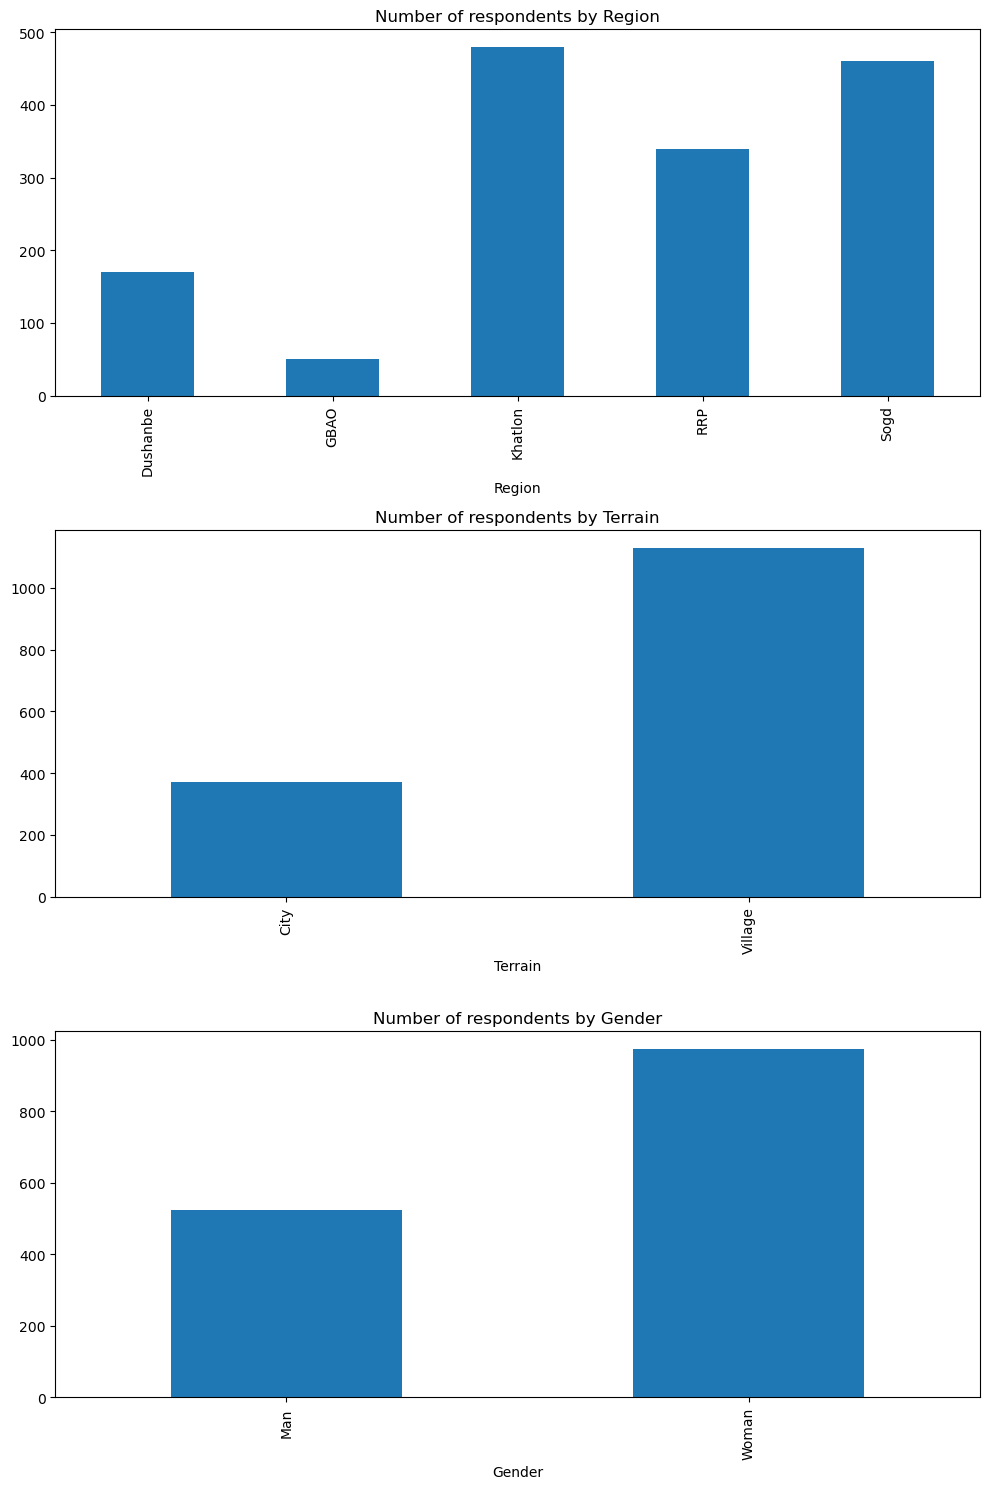

Description of results:
1. Number and proportion of citizens surveyed by region:
Region
Dushanbe    170
GBAO         50
Khatlon     480
RRP         340
Sogd        460
Name: Count, dtype: int64

2. Number and proportion of citizens surveyed by type of area (urban/rural):
Terrain
City        370
Village    1130
Name: Count, dtype: int64

3. Number and proportion of citizens surveyed by gender:
Gender
Man      525
Woman    975
Name: Count, dtype: int64


In [7]:
# Группировка данных по региону, типу местности и полу респондентов
grouped_data = df.groupby(['Region', 'Terrain', 'Gender']).size().reset_index(name='Count')

# Построение диаграммы
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Диаграмма по регионам
ax1 = grouped_data.groupby('Region').sum()['Count'].plot(kind='bar', ax=axes[0])
ax1.set_title('Number of respondents by Region')

# Диаграмма по типу местности
ax2 = grouped_data.groupby('Terrain').sum()['Count'].plot(kind='bar', ax=axes[1])
ax2.set_title('Number of respondents by Terrain')

# Диаграмма по полу респондентов
ax3 = grouped_data.groupby('Gender').sum()['Count'].plot(kind='bar', ax=axes[2])
ax3.set_title('Number of respondents by Gender')

plt.tight_layout()
plt.show()

ax1.figure.savefig('respondents_by_region.png')

# Вывод описания результатов
print("Description of results:")
print("1. Number and proportion of citizens surveyed by region:")
print(grouped_data.groupby('Region').sum()['Count'])
print("\n2. Number and proportion of citizens surveyed by type of area (urban/rural):")
print(grouped_data.groupby('Terrain').sum()['Count'])
print("\n3. Number and proportion of citizens surveyed by gender:")
print(grouped_data.groupby('Gender').sum()['Count'])


In [5]:
# Группировка данных по источнику новостей
source_info = df.groupby('source_news').size().reset_index(name='Count')

# Вычисление процентного соотношения
source_info['Percentage'] = (source_info['Count'] / source_info['Count'].sum()) * 100

# Печать таблицы с данными
print("Table by main sources of information in our country:")
print(source_info)

# Группировка данных по региону и типу местности
region_terrain_info = df.groupby(['Region', 'Terrain', 'source_news']).size().reset_index(name='Count')

# Добавление столбца с процентным соотношением
region_terrain_info['Percentage'] = region_terrain_info.apply(lambda x: (x['Count'] / region_terrain_info[region_terrain_info['Region'] == x['Region']]['Count'].sum()) * 100, axis=1)

# Печать таблицы с данными по региону и типу местности
print("\nTable by main sources of information by region and terrain:")
print(region_terrain_info)

Table by main sources of information in our country:
                          source_news  Count  Percentage
0                            Internet     89    5.933333
1                         Local radio     48    3.200000
2           No/not interested in news     21    1.400000
3  Official newspapers in our country     10    0.666667
4          Other foreign news sources     11    0.733333
5                 Russian TV channels     32    2.133333
6                  Russian newspapers      1    0.066667
7                       Russian radio      3    0.200000
8  Television channels of our country   1192   79.466667
9                       word_of_mouth     93    6.200000

Table by main sources of information by region and terrain:
      Region  Terrain                         source_news  Count  Percentage
0   Dushanbe     City                            Internet     23   13.529412
1   Dushanbe     City                         Local radio      3    1.764706
2   Dushanbe     City       

Table by access to the Internet through computer, mobile phone, and VPN by region, terrain, and gender:
      Region  Terrain Gender  Total  Computer  Phone   VPN  Computer (%)  \
0   Dushanbe     City    Man     43       4.0     27   4.0      9.302326   
1   Dushanbe     City  Woman    127      14.0     61   9.0     11.023622   
2       GBAO     City    Man      3       3.0      3   1.0    100.000000   
3       GBAO     City  Woman      7       1.0      6   2.0     14.285714   
4       GBAO  Village    Man     17       3.0      7   NaN     17.647059   
5       GBAO  Village  Woman     23       NaN      6   NaN           NaN   
6    Khatlon     City    Man     15       3.0      8   NaN     20.000000   
7    Khatlon     City  Woman     35       5.0     14   4.0     14.285714   
8    Khatlon  Village    Man    157       2.0     41   4.0      1.273885   
9    Khatlon  Village  Woman    273       9.0     31  12.0      3.296703   
10       RRP     City    Man      8       3.0      6   1.0  

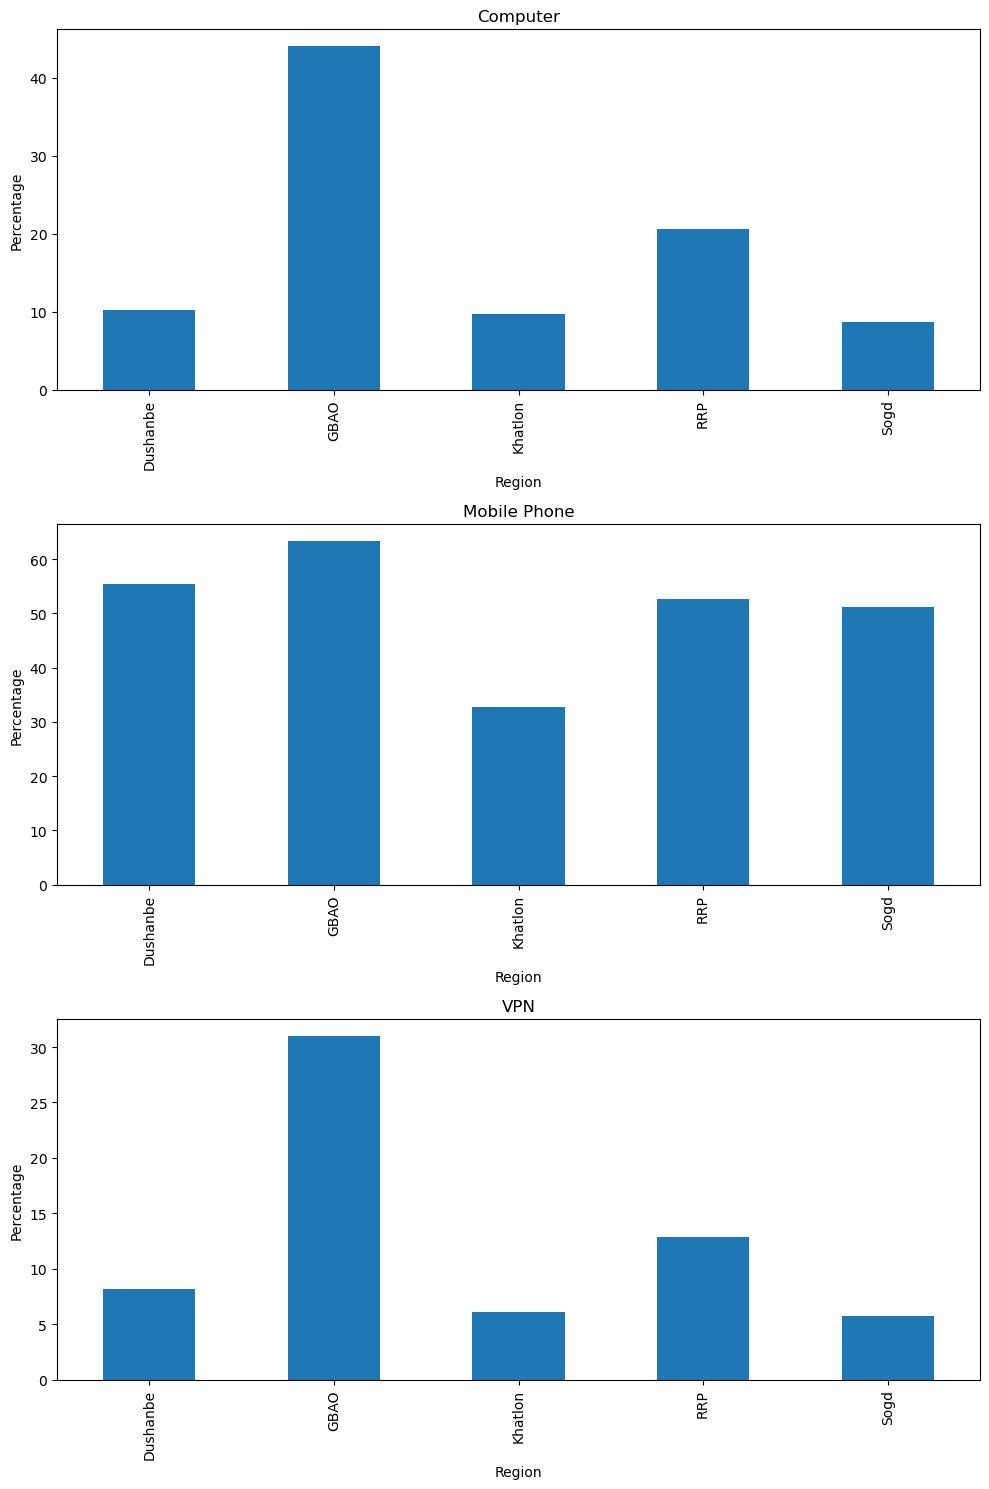


Description of results:
The tables and diagrams above show the proportion of respondents who access the Internet through a computer, mobile phone, and VPN by region, terrain, and gender.


In [24]:
# Группировка данных по региону, типу местности и полу респондентов
grouped_data = df.groupby(['Region', 'Terrain', 'Gender']).size().reset_index(name='Total')

# Фильтрация данных по использованию интернета через компьютер
computer_data = df[df['Internet_Computer'] != 'Never']
computer_grouped = computer_data.groupby(['Region', 'Terrain', 'Gender']).size().reset_index(name='Computer')

# Фильтрация данных по использованию интернета через мобильный телефон
phone_data = df[df['Internet_Cellphone'] != 'Never']
phone_grouped = phone_data.groupby(['Region', 'Terrain', 'Gender']).size().reset_index(name='Phone')

# Фильтрация данных по использованию интернета через VPN
vpn_data = df[df['Internet_VPN'] != 'Never']
vpn_grouped = vpn_data.groupby(['Region', 'Terrain', 'Gender']).size().reset_index(name='VPN')

# Объединение данных
merged_data = pd.merge(grouped_data, computer_grouped, on=['Region', 'Terrain', 'Gender'], how='left')
merged_data = pd.merge(merged_data, phone_grouped, on=['Region', 'Terrain', 'Gender'], how='left')
merged_data = pd.merge(merged_data, vpn_grouped, on=['Region', 'Terrain', 'Gender'], how='left')

# Вычисление процентного соотношения
merged_data['Computer (%)'] = (merged_data['Computer'] / merged_data['Total']) * 100
merged_data['Phone (%)'] = (merged_data['Phone'] / merged_data['Total']) * 100
merged_data['VPN (%)'] = (merged_data['VPN'] / merged_data['Total']) * 100

# Печать таблицы с данными
print("Table by access to the Internet through computer, mobile phone, and VPN by region, terrain, and gender:")
print(merged_data)

merged_data.to_excel('internet_usage_by_region_terrain_gender.xlsx', index=False)

# Построение диаграмм
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Диаграмма по использованию интернета через компьютер
merged_data.groupby('Region')['Computer (%)'].mean().plot(kind='bar', ax=axes[0], title='Computer')
axes[0].set_ylabel('Percentage')

# Диаграмма по использованию интернета через мобильный телефон
merged_data.groupby('Region')['Phone (%)'].mean().plot(kind='bar', ax=axes[1], title='Mobile Phone')
axes[1].set_ylabel('Percentage')

# Диаграмма по использованию интернета через VPN
merged_data.groupby('Region')['VPN (%)'].mean().plot(kind='bar', ax=axes[2], title='VPN')
axes[2].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

axes[0].figure.savefig('computer_access_by_region.png')

# Описание результатов
print("\nDescription of results:")
print("The tables and diagrams above show the proportion of respondents who access the Internet through a computer, mobile phone, and VPN by region, terrain, and gender.")


Main social networks, chats, and messaging apps used by respondents throughout the country:
Social Networks:
Social_Network
Question not asked     85.000000
Facebook                3.600000
Youtube                 3.266667
Odnoklassniki           3.133333
Instagram               1.733333
Other                   1.400000
Google                  1.266667
Mail.ru and Moi Mir     0.333333
Vkontakte               0.266667
Name: proportion, dtype: float64

Messaging Apps:
Messaging_App
Question not asked    85.466667
IMO                   10.800000
Viber                  2.266667
whatsapp               1.133333
Telegram               0.333333
Name: proportion, dtype: float64

Cellphone Internet Usage:
Internet_Cellphone
Never                    62.533333
Daily                    19.266667
Few times a week          8.733333
Rarely                    6.600000
Several times a month     2.866667
Name: proportion, dtype: float64

Main social networks, chats, and messaging apps used by respondents

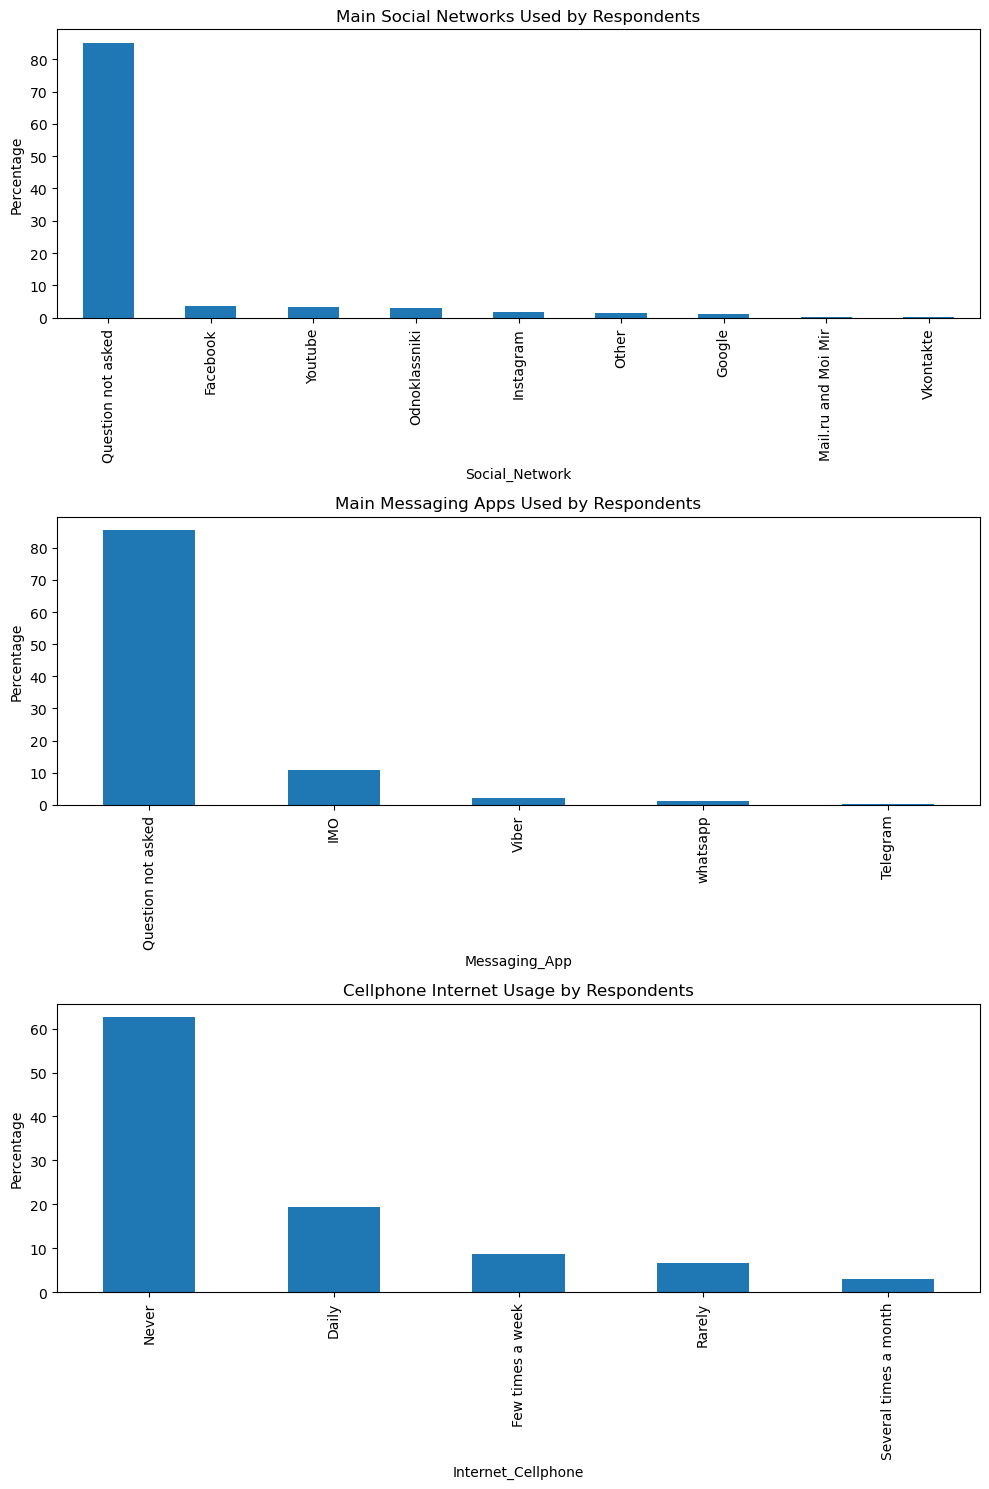

In [25]:
# Фильтрация данных по социальным сетям, чатам и мессенджерам
social_data = df[['Social_Network', 'Messaging_App', 'Internet_Cellphone']]

# Определение основных социальных сетей, чатов и мессенджеров
social_network_usage = social_data['Social_Network'].value_counts(normalize=True) * 100
messaging_app_usage = social_data['Messaging_App'].value_counts(normalize=True) * 100
cellphone_internet_usage = social_data['Internet_Cellphone'].value_counts(normalize=True) * 100

# Печать результатов
print("Main social networks, chats, and messaging apps used by respondents throughout the country:")
print("Social Networks:")
print(social_network_usage)
print("\nMessaging Apps:")
print(messaging_app_usage)
print("\nCellphone Internet Usage:")
print(cellphone_internet_usage)

# Группировка данных по региону и полу респондентов
region_gender_data = df.groupby(['Region', 'Gender'])[['Social_Network', 'Messaging_App', 'Internet_Cellphone']].agg(lambda x: x.value_counts().idxmax())

# Печать результатов
print("\nMain social networks, chats, and messaging apps used by respondents by region and gender:")
print(region_gender_data)

# Экспорт данных в Excel
social_data.to_excel('social_data.xlsx', index=False)


# Построение диаграмм для основных социальных сетей, чатов и мессенджеров по всей стране
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

social_network_usage.plot(kind='bar', ax=axes[0], title='Main Social Networks Used by Respondents')
axes[0].set_ylabel('Percentage')

messaging_app_usage.plot(kind='bar', ax=axes[1], title='Main Messaging Apps Used by Respondents')
axes[1].set_ylabel('Percentage')

cellphone_internet_usage.plot(kind='bar', ax=axes[2], title='Cellphone Internet Usage by Respondents')
axes[2].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

Proportion of respondents whose family members have:
Cellular Telephone Ownership:
Cellphone_Ownership
Yes    82.266667
No     17.733333
Name: proportion, dtype: float64

Computer Ownership:
PC_Ownership
No     83.733333
Yes    16.266667
Name: proportion, dtype: float64

Satellite Television Ownership:
TV_Ownership
Yes    50.266667
No     49.733333
Name: proportion, dtype: float64

Automobile Ownership:
Car_Ownership
No     65.8
Yes    34.2
Name: proportion, dtype: float64


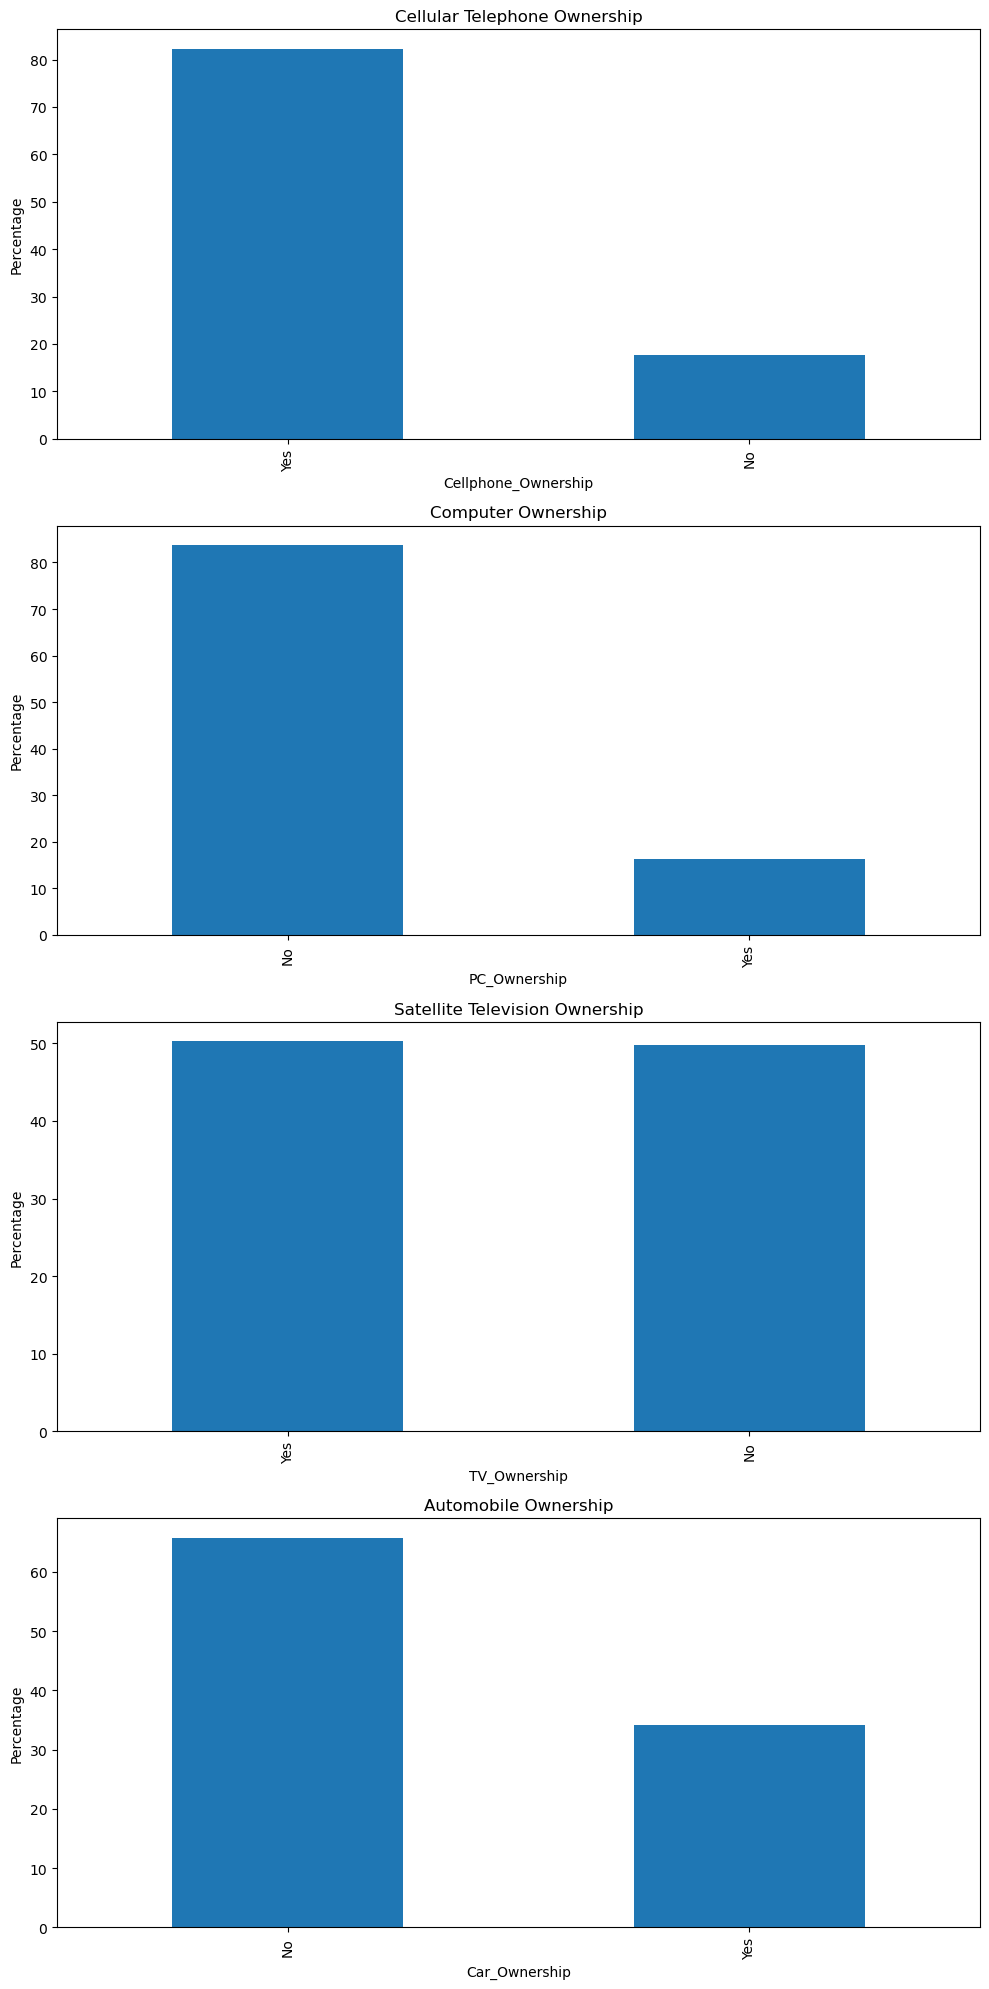

In [29]:
# Группировка данных по владению различными объектами
ownership_data = df[['Cellphone_Ownership', 'PC_Ownership', 'TV_Ownership', 'Car_Ownership']]

# Вычисление доли респондентов, владеющих каждым объектом
cellphone_ownership_percentage = ownership_data['Cellphone_Ownership'].value_counts(normalize=True) * 100
pc_ownership_percentage = ownership_data['PC_Ownership'].value_counts(normalize=True) * 100
tv_ownership_percentage = ownership_data['TV_Ownership'].value_counts(normalize=True) * 100
car_ownership_percentage = ownership_data['Car_Ownership'].value_counts(normalize=True) * 100

# Печать результатов
print("Proportion of respondents whose family members have:")
print("Cellular Telephone Ownership:")
print(cellphone_ownership_percentage)
print("\nComputer Ownership:")
print(pc_ownership_percentage)
print("\nSatellite Television Ownership:")
print(tv_ownership_percentage)
print("\nAutomobile Ownership:")
print(car_ownership_percentage)

# Группировка данных по региону
region_ownership_data = df.groupby('Region')[['Cellphone_Ownership', 'PC_Ownership', 'TV_Ownership', 'Car_Ownership']].agg(lambda x: x.value_counts(normalize=True) * 100)

# Построение диаграмм для доли респондентов, владеющих различными объектами
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

cellphone_ownership_percentage.plot(kind='bar', ax=axes[0], title='Cellular Telephone Ownership')
axes[0].set_ylabel('Percentage')

pc_ownership_percentage.plot(kind='bar', ax=axes[1], title='Computer Ownership')
axes[1].set_ylabel('Percentage')

tv_ownership_percentage.plot(kind='bar', ax=axes[2], title='Satellite Television Ownership')
axes[2].set_ylabel('Percentage')

car_ownership_percentage.plot(kind='bar', ax=axes[3], title='Automobile Ownership')
axes[3].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

axes[0].figure.savefig('cellphone_ownership_percentage.png')


In [30]:
# Группировка данных по владению различными объектами
ownership_data = df[['Cellphone_Ownership', 'PC_Ownership', 'TV_Ownership', 'Car_Ownership']]

# Вычисление доли респондентов, владеющих каждым объектом
cellphone_ownership_percentage = ownership_data['Cellphone_Ownership'].value_counts(normalize=True) * 100
pc_ownership_percentage = ownership_data['PC_Ownership'].value_counts(normalize=True) * 100
tv_ownership_percentage = ownership_data['TV_Ownership'].value_counts(normalize=True) * 100
car_ownership_percentage = ownership_data['Car_Ownership'].value_counts(normalize=True) * 100

# Создание нового Excel файла и запись результатов в него
with pd.ExcelWriter('ownership_analysis.xlsx') as writer:
    pd.DataFrame({'Cellular Telephone Ownership': cellphone_ownership_percentage}).to_excel(writer, sheet_name='Cellphone_Ownership')
    pd.DataFrame({'Computer Ownership': pc_ownership_percentage}).to_excel(writer, sheet_name='PC_Ownership')
    pd.DataFrame({'Satellite Television Ownership': tv_ownership_percentage}).to_excel(writer, sheet_name='TV_Ownership')
    pd.DataFrame({'Automobile Ownership': car_ownership_percentage}).to_excel(writer, sheet_name='Car_Ownership')

In [28]:
# Средний возраст всех респондентов
average_age_all = df['Age'].mean()
print("Average age of all respondents:", round(average_age_all, 2))

# Средний возраст мужчин
average_age_male = df[df['Gender'] == 'Man']['Age'].mean()
print("Average age of male respondents:", round(average_age_male, 2))

# Средний возраст женщин
average_age_female = df[df['Gender'] == 'Woman']['Age'].mean()
print("Average age of female respondents:", round(average_age_female, 2))

# Разделение возраста на категории
bins = [17, 24, 30, 35, 40, 45, 50, 55, 60, 65, np.inf]
labels = ['18-24', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 'Over 65']

df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Доля каждой категории возраста
age_category_share_all = df['Age_Category'].value_counts(normalize=True) * 100
print("\nShare of each age category across the republic:")
print(age_category_share_all)

# Доля каждой категории возраста по полу
age_category_share_gender = df.groupby('Gender')['Age_Category'].value_counts(normalize=True) * 100
print("\nShare of each age category by gender:")
print(age_category_share_gender)

# Доля каждой категории возраста по региону
age_category_share_region = df.groupby('Region')['Age_Category'].value_counts(normalize=True) * 100
print("\nShare of each age category by region:")
print(age_category_share_region)

# Создание нового Excel файла и запись результатов в него
with pd.ExcelWriter('age_analysis.xlsx') as writer:
    pd.DataFrame({'Average Age of All Respondents': [round(average_age_all, 2)]}).to_excel(writer, sheet_name='Average_Age_All_Respondents')
    pd.DataFrame({'Average Age of Male Respondents': [round(average_age_male, 2)]}).to_excel(writer, sheet_name='Average_Age_Male_Respondents')
    pd.DataFrame({'Average Age of Female Respondents': [round(average_age_female, 2)]}).to_excel(writer, sheet_name='Average_Age_Female_Respondents')
    age_category_share_all.to_excel(writer, sheet_name='Age_Category_Share_All')
    age_category_share_gender.to_excel(writer, sheet_name='Age_Category_Share_Gender')
    age_category_share_region.to_excel(writer, sheet_name='Age_Category_Share_Region')


Average age of all respondents: 41.79
Average age of male respondents: 43.13
Average age of female respondents: 41.06

Share of each age category across the republic:
Age_Category
25-30      13.533333
18-24      12.800000
31-35      11.666667
36-40      11.400000
46-50       9.866667
51-55       9.533333
41-45       8.933333
Over 65     8.266667
56-60       7.400000
61-65       6.600000
Name: proportion, dtype: float64

Share of each age category by gender:
Gender  Age_Category
Man     18-24           12.380952
        25-30           12.380952
        36-40           11.619048
        51-55           10.666667
        Over 65         10.666667
        46-50           10.095238
        41-45            9.714286
        31-35            8.571429
        56-60            7.428571
        61-65            6.476190
Woman   25-30           14.153846
        31-35           13.333333
        18-24           13.025641
        36-40           11.282051
        46-50            9.743590
       

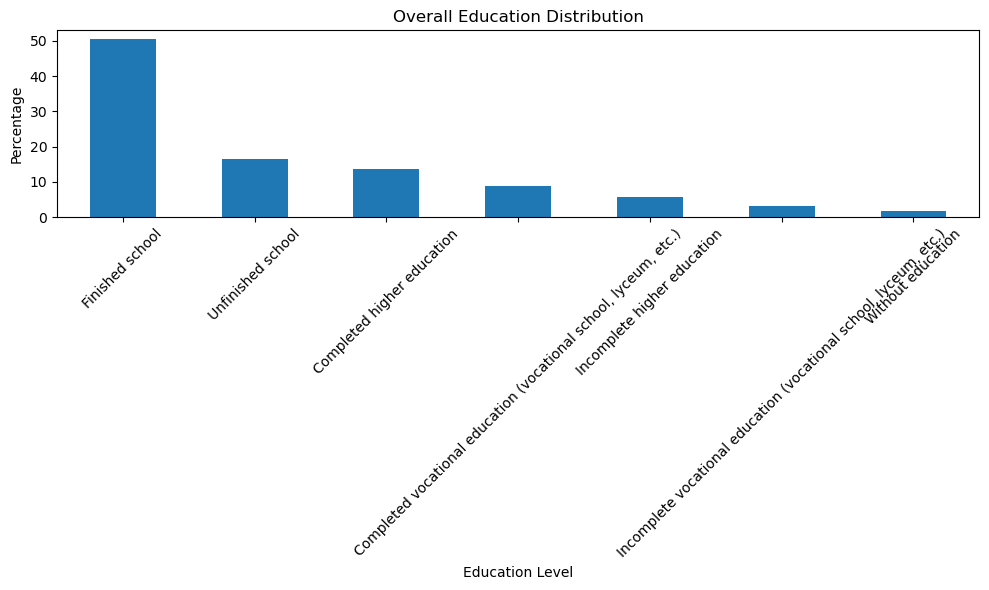

<Figure size 1200x600 with 0 Axes>

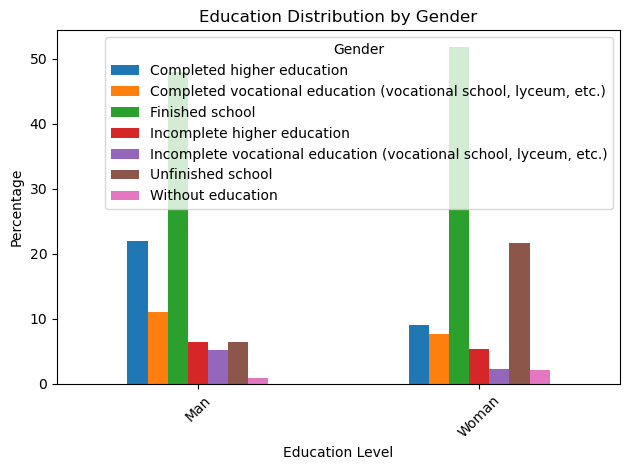

<Figure size 1200x600 with 0 Axes>

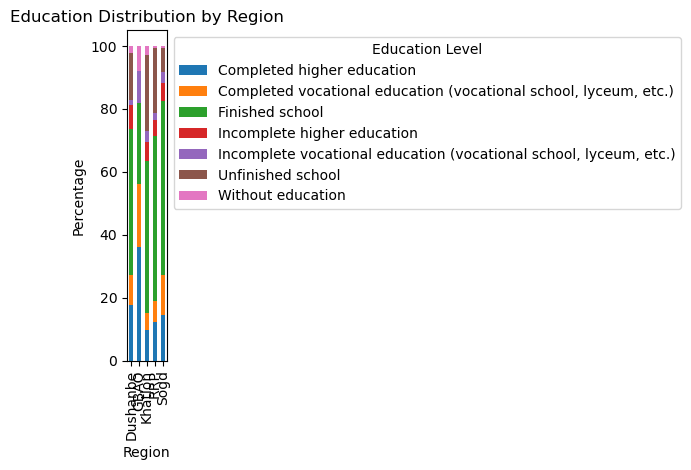

In [57]:
# Сохранение диаграмм в файлы PNG
plt.figure(figsize=(10, 6))
education_distribution.plot(kind='bar', rot=45)
plt.title('Overall Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('overall_education_distrib_ution.png')

plt.figure(figsize=(12, 6))
education_by_gender.unstack().plot(kind='bar', rot=45)
plt.title('Education Distribution by Gender')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('education_dis_tribu_tion_by_gender.png')

plt.figure(figsize=(12, 6))
education_by_region.unstack().plot(kind='bar', stacked=True)
plt.title('Education Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('education_distrib_ution_by_region.png')


/var/folders/sq/6fqmym6j0sg_ms369zp34ymw0000gn/T/ipykernel_22649/1805544586.py:34: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



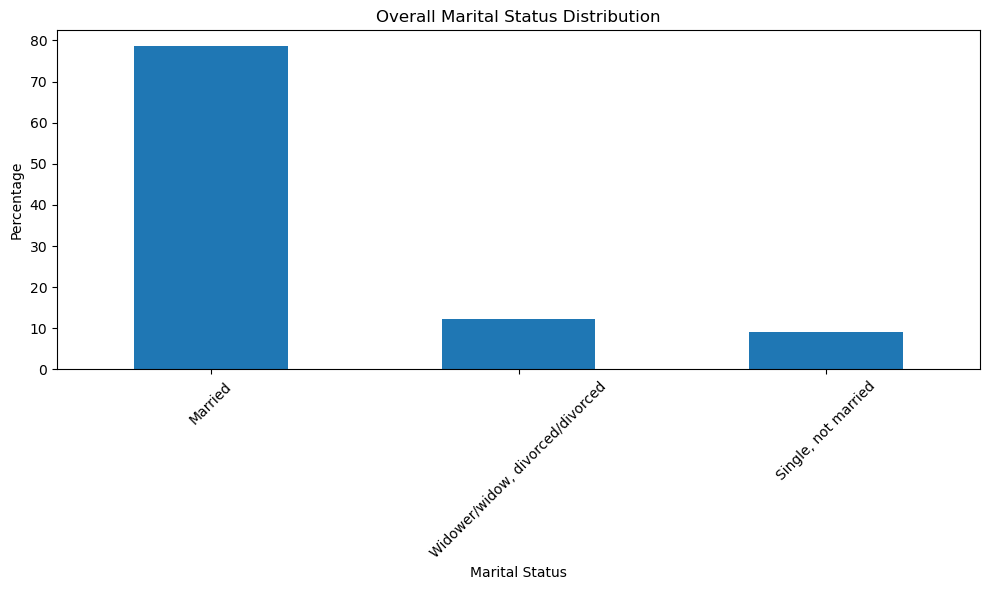

<Figure size 1200x600 with 0 Axes>

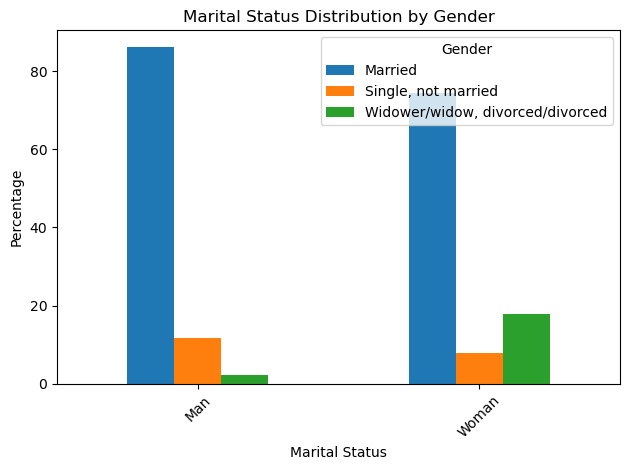

<Figure size 1200x600 with 0 Axes>

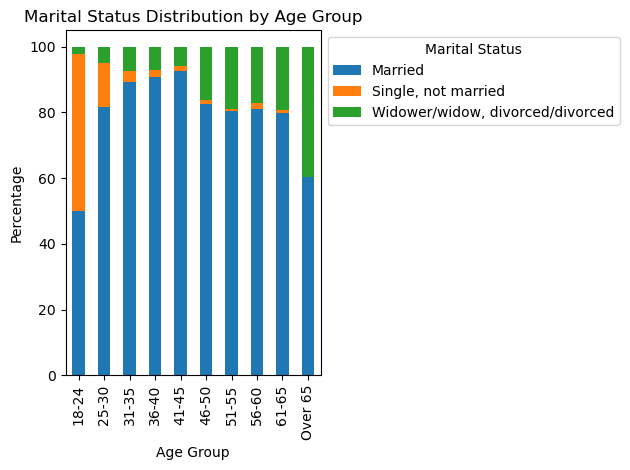

<Figure size 1200x600 with 0 Axes>

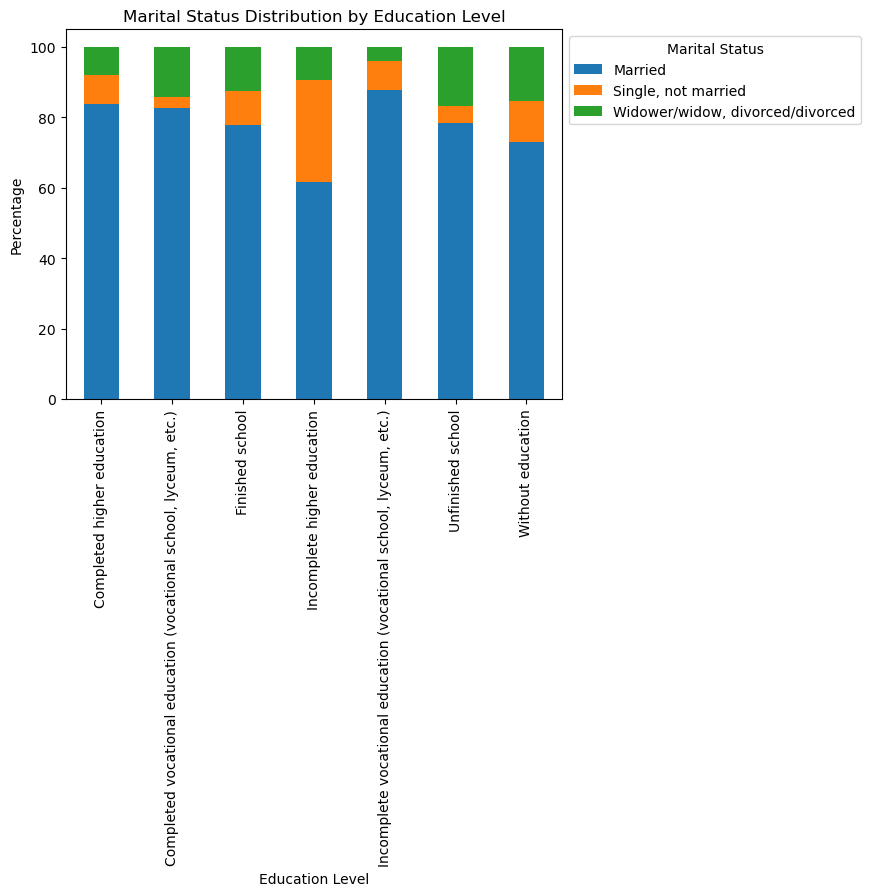

In [58]:


# Сохранение диаграмм в файлы PNG
plt.figure(figsize=(10, 6))
marital_status_distribution.plot(kind='bar', rot=45)
plt.title('Overall Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('overall_marital_status_distribution.png')

plt.figure(figsize=(12, 6))
marital_status_by_gender.unstack().plot(kind='bar', rot=45)
plt.title('Marital Status Distribution by Gender')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('marital_status_distribution_by_gender.png')

plt.figure(figsize=(12, 6))
marital_status_by_age_group.unstack().plot(kind='bar', stacked=True)
plt.title('Marital Status Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Marital Status', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('marital_status_distribution_by_age_group.png')

plt.figure(figsize=(12, 6))
marital_status_by_education.unstack().plot(kind='bar', stacked=True)
plt.title('Marital Status Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Marital Status', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('marital_status_distribution_by_education_level.png')
